In [96]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [97]:
# reading in the full dataset with dft descriptors
ncb_data = pd.read_csv('../Data/Predictive_Modeling_Inputs/dft_descriptors_8highest.csv')
tsa1_ncbs = pd.read_csv('../Data/Kinetic_Thermodynamic_Correlation/ncbs_selected_for_kinetic_calcs.csv')
tsa1_ncb_list = tsa1_ncbs['Cofactor Name'].to_list()

In [98]:
# ncb_data.drop(columns=['Cofactor'],axis=1)
names = ncb_data['Cofactor']# = names

In [99]:
# classifying if ncbs were found in literature for coloring
previously_studied_ncbs = ['A1a_reduced', 'B1a_reduced', 'B1b_reduced', 'D1a_reduced', 
                           'C1a_reduced', 'E1a_reduced', 'J1a_reduced',
                           'F1a_reduced', 'F1b_reduced', 'F2a_reduced', 'F5a_reduced', 
                           'F3a_reduced', 'G1a_reduced', 'H1a_reduced',
                           'K1a_reduced', 'I1a_reduced']
pca_group = []
pca_coloring = []
pca_shape = []
pca_size = []
tsa1_color = []
tsa1_shape = []
tsa1_size = []

for idx,row in ncb_data.iterrows():
    if row['Cofactor'] in previously_studied_ncbs:
        pca_group.append('Studied')
        pca_coloring.append('#5c8625')
        pca_shape.append('*')
        pca_size.append(150)
    else:
        pca_group.append('Novel')
        pca_coloring.append('#a0a0a0')
        pca_shape.append('o')
        pca_size.append(100)
    if row['Cofactor'].split('_')[0] in tsa1_ncb_list:
        tsa1_color.append('#000080')
        tsa1_shape.append('*')
        tsa1_size.append(150)
    else:
        tsa1_color.append('#a0a0a0')
        tsa1_shape.append('o')
        tsa1_size.append(100)
        

ncb_data['Grouping'] = pca_group
ncb_data['Coloring'] = pca_coloring
ncb_data['Shape'] = pca_shape

In [100]:
# removing cofactor identity from pca data
ncb_data_no_names = ncb_data.drop(columns=['Cofactor','Grouping','Coloring','Shape'],axis=1)

In [101]:
# standardizing the data before pca
ncb_data_standardized = (ncb_data_no_names - ncb_data_no_names.mean()) / ncb_data_no_names.std()
# removing columns with no variance or one-hot encoding
column_drop = ncb_data_standardized.columns[ncb_data_standardized.isna().any()].tolist()
pca_data = ncb_data_standardized.drop(columns=column_drop,axis=1)
# performing pca
pca = PCA(n_components = 0.95)
features_pca = pca.fit_transform(pca_data)

(-2.75, 4.25)

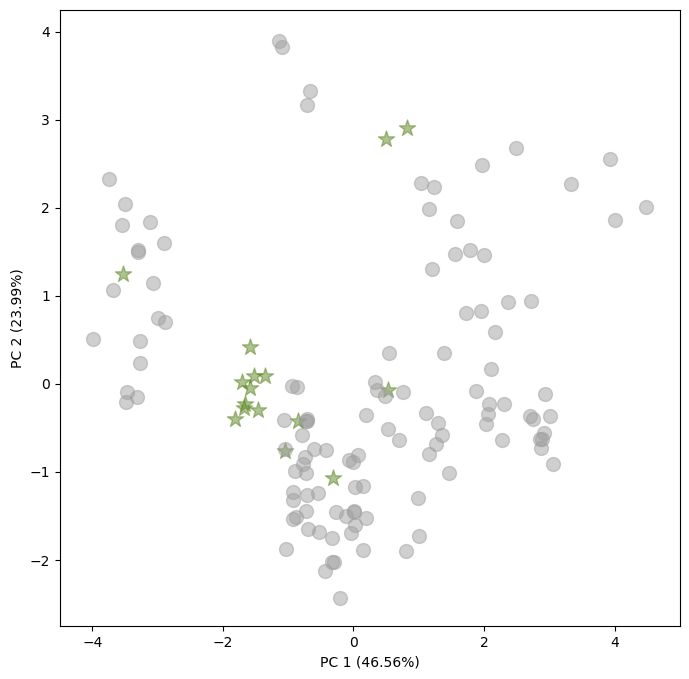

In [102]:
# limiting dataset to DFT model descriptors
limited_pca_data = pca_data[['C4H_f-','C3_f-','C3sub_f-','C2_NBO-q','C3_NBO-q','C5_NBO-q','N1_NBO-q','C4H_NBO-q']]

# performing pca
pca = PCA(n_components = 0.95)
features_pca = pca.fit_transform(limited_pca_data)

# plotting pca plot
plt.figure(figsize=(8,8))
i = 0
for ncb in range(0,len(pca_shape)):
    plt.scatter(features_pca[i,0], features_pca[i,1],
                marker=pca_shape[i],
                color=pca_coloring[i],
                alpha=0.5,
                s=pca_size[i])
    i += 1
# labeling axes with explained variance for each pc
plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# letting axes limits
plt.xlim(-4.5,5)
plt.ylim(-2.75,4.25)

# plt.savefig('ncb_pca_full_pfi-descp.svg',dpi=400)

(-2.75, 4.25)

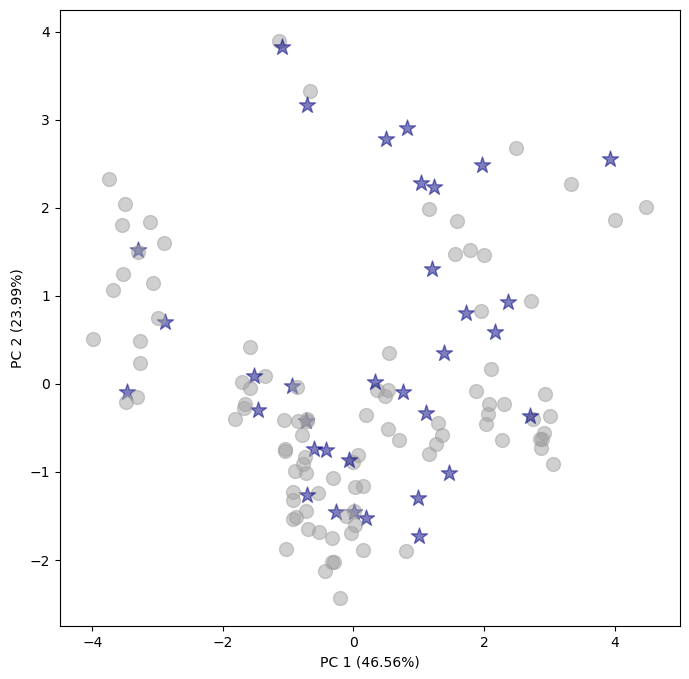

In [103]:
## COLORING BY IF CALCULATING TS A-I

# limiting dataset to DFT model descriptors
limited_pca_data = pca_data[['C4H_f-','C3_f-','C3sub_f-','C2_NBO-q','C3_NBO-q','C5_NBO-q','N1_NBO-q','C4H_NBO-q']]

# performing pca
pca = PCA(n_components = 0.95)
features_pca = pca.fit_transform(limited_pca_data)

# plotting pca plot
plt.figure(figsize=(8,8))
i = 0
for ncb in range(0,len(tsa1_shape)):
    plt.scatter(features_pca[i,0], features_pca[i,1],
                marker=tsa1_shape[i],
                color=tsa1_color[i],
                alpha=0.5,
                s=tsa1_size[i])
    i += 1
# labeling axes with explained variance for each pc
plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# letting axes limits
plt.xlim(-4.5,5)
plt.ylim(-2.75,4.25)

# plt.savefig('ncb_pca_full_pfi-descp_byTSA1.svg',dpi=400)

In [104]:
# separating data by train/test/validation set

# reading in ROBERT csv with data separation
split_data = pd.read_csv('../Data/ROBERT_Results/DFT/GENERATE/Best_model/No_PFI/MVL_85_db.csv')
split_data = split_data.drop(columns=['dG_C5','N1_NBO-q','C2_NBO-q','C3_NBO-q','C4H_NBO-q','C5_NBO-q','C3sub_f-','C3_f-','C4H_f-'],axis=1)

# making different lists
split_group = []
split_coloring = []
split_size = []
split_shape = []

for idx,row in split_data.iterrows():
    if row['Set'] == 'Training':
        split_group.append('Train')
        split_coloring.append('#a0a0a0')
        split_shape.append('*')
        split_size.append(150)
    elif row['Set'] == 'Validation':
        split_group.append('Validation')
        split_coloring.append('#5c8625')
        split_shape.append('o')
        split_size.append(100)
    elif row['Set'] == 'Test':
        split_group.append('Test')
        split_coloring.append('#000080')
        split_shape.append('d')
        split_size.append(100)

(-2.75, 4.25)

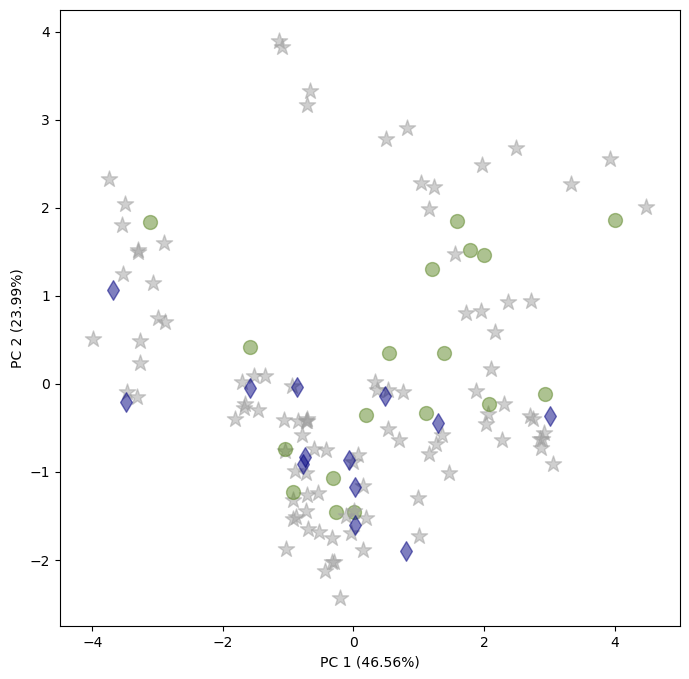

In [105]:
## COLORING BY IF CALCULATING TS A-I

# limiting dataset to DFT model descriptors
limited_pca_data = pca_data[['C4H_f-','C3_f-','C3sub_f-','C2_NBO-q','C3_NBO-q','C5_NBO-q','N1_NBO-q','C4H_NBO-q']]

# performing pca
pca = PCA(n_components = 0.95)
features_pca = pca.fit_transform(limited_pca_data)

# plotting pca plot
plt.figure(figsize=(8,8))
i = 0
for ncb in range(0,len(split_shape)):
    plt.scatter(features_pca[i,0], features_pca[i,1],
                marker=split_shape[i],
                color=split_coloring[i],
                alpha=0.5,
                s=split_size[i])
    i += 1
# labeling axes with explained variance for each pc
plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# letting axes limits
plt.xlim(-4.5,5)
plt.ylim(-2.75,4.25)

# plt.savefig('ncb_pca_full_pfi-descp_bysplit.svg',dpi=600)

In [106]:
# separating data by new or old

# reading in ROBERT csv with data separation
new_sub_pca = pd.read_csv('../Data/Predictive_Modeling_inputs/new_ncbs_combined_dft_db.csv')
# new_sub_pca_limit = new_sub_pca.drop(columns=['dG_C5','N1_NBO-q','C2_NBO-q','C3_NBO-q','C4H_NBO-q','C5_NBO-q','C3sub_f-','C3_f-','C4H_f-'],axis=1)
all_sub_pca = pd.concat([ncb_data,new_sub_pca],ignore_index=True)
all_sub_pca = all_sub_pca[['Cofactor','C4H_f-','C3_f-','C3sub_f-','C2_NBO-q','C3_NBO-q','C5_NBO-q','N1_NBO-q','C4H_NBO-q']]

# making different lists
old_group = []
old_coloring = []
old_size = []
old_shape = []
new_group = []
new_coloring = []
new_size = []
new_shape = []
group = []
coloring = []
size = []
shape = []

for idx,row in all_sub_pca.iterrows():
    if 'reduced' in row['Cofactor']:
        old_group.append('Original')
        group.append('Original')
        old_coloring.append('#a0a0a0')
        coloring.append('#a0a0a0')
        old_shape.append('o')
        shape.append('o')
        old_size.append(100)
        size.append(100)
    else:
        new_group.append('New')
        group.append('New')
        new_coloring.append('#000080')
        coloring.append('#000080')
        new_shape.append('*')
        shape.append('*')
        new_size.append(150)
        size.append(150)

(-2.75, 4.25)

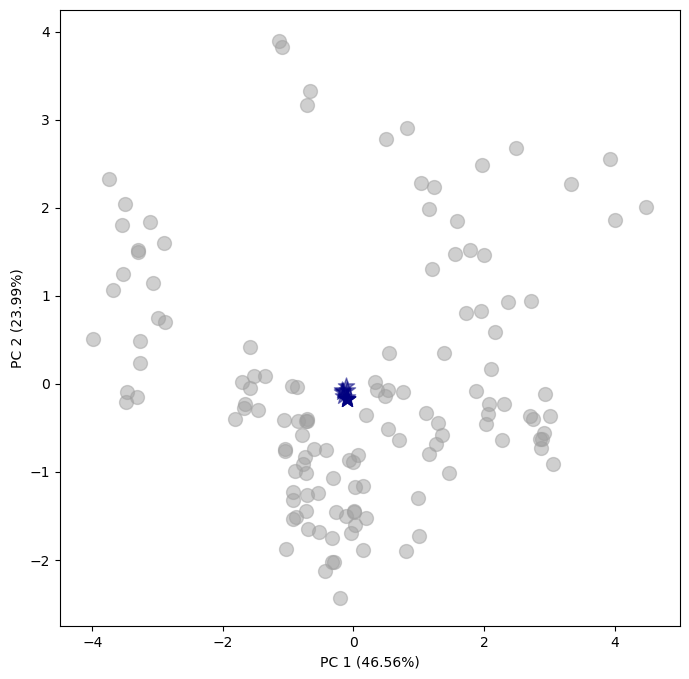

In [107]:
## Adding new NCBs to PCA plot
# limiting dataset to DFT model descriptors
limited_pca_data = pca_data[['C4H_f-','C3_f-','C3sub_f-','C2_NBO-q','C3_NBO-q','C5_NBO-q','N1_NBO-q','C4H_NBO-q']]
limited_new_sub_pca_data = new_sub_pca[['C4H_f-','C3_f-','C3sub_f-','C2_NBO-q','C3_NBO-q','C5_NBO-q','N1_NBO-q','C4H_NBO-q']]  

# performing pca
pca = PCA(n_components = 0.95)
features_pca = pca.fit_transform(limited_pca_data)
# Transforming new data using the already fitted PCA model
new_data_transformed = pca.transform(limited_new_sub_pca_data)

# plotting pca plot
plt.figure(figsize=(8,8))
# plotting original
i = 0
for ncb in range(0,len(old_shape)):
    plt.scatter(features_pca[i,0], features_pca[i,1],
                marker=shape[i],
                color=coloring[i],
                alpha=0.5,
                s=size[i])
    i += 1
# plotting new
i = 0
for ncb in range(0,len(new_shape)):
    plt.scatter(new_data_transformed[i,0], new_data_transformed[i,1],
                marker=new_shape[i],
                color=new_coloring[i],
                alpha=0.5,
                s=new_size[i])
    i += 1
# labeling axes with explained variance for each pc
plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# letting axes limits
plt.xlim(-4.5,5)
plt.ylim(-2.75,4.25)

# plt.savefig('ncb_pca_full_pfi-descp_with-new.svg',dpi=600)